In [3]:
# -*- coding:utf-8 -*-
# 9.2.2 模型构建
### 1 模型输入 # 80% 做训练集、20% 做测试集

# 数据抽样代码

import pandas as pd
from pandas import DataFrame,Series
import random 
import numpy as np

inputfile = 'moment.csv'
data = pd.read_csv(inputfile, encoding='gbk')
# 注意，此处不能用shuffle
sampler = np.random.permutation(len(data))
d = data.take(sampler).as_matrix()

data_train = d[:int(0.8*len(data)),:] #选取前80%做训练集
data_test = d[int(0.8*len(data)):,:] #选取后20%做测试集
print(data_train.shape)
print(data_test.shape)


(162, 11)
(41, 11)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [9]:
# 构建支持向量机模型代码
x_train = data_train[:, 2:]*30 #放大特征
y_train = data_train[:,0].astype(int)
x_test = data_test[:, 2:]*30 #放大特征
y_test = data_test[:,0].astype(int)
print(x_train.shape)
print(x_test.shape)
# 导入模型相关的支持向量机函数  建立并且训练模型
from sklearn import svm 
model = svm.SVC()
model.fit(x_train, y_train)
import pickle
pickle.dump(model, open('svcmodel.model','wb'))# model = pickle.load(open('svcmodel.model','rb'))

# 导入输出相关的库，生成混淆矩阵
from sklearn import metrics
cm_train = metrics.confusion_matrix(y_train, model.predict(x_train)) # 训练样本的混淆矩阵
cm_test = metrics.confusion_matrix(y_test, model.predict(x_test)) # 测试样本的混淆矩阵
print(cm_train.shape)
print(cm_test.shape)
df1 = DataFrame(cm_train, index = range(1,6), columns=range(1,6))
df2 = DataFrame(cm_test, index = range(1,5), columns=range(1,5))
df1.to_excel('trainPre.xlsx')
df2.to_excel('testPre.xlsx')
print(model.score(x_train,y_train)) # 评价模型训练的准确率
print(model.score(x_test,y_test)) # 评价模型测试的准确率

(162, 9)
(41, 9)
(5, 5)
(4, 4)
0.9567901234567902
0.9512195121951219


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
pd.DataFrame(model.predict(x_train))[0].value_counts()

3    68
1    38
2    34
4    18
5     4
Name: 0, dtype: int64

In [18]:
pd.DataFrame(model.predict(x_test))[0].value_counts()

3    16
2    12
1    10
4     3
Name: 0, dtype: int64

In [13]:
import matplotlib.pyplot as plt #导入作图库
% matplotlib inline
plt.matshow(cm_test, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
plt.colorbar() #颜色标签
  
for x in range(len(cm_test)): #数据标签
    for y in range(len(cm_test)):
        plt.annotate(cm_test[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')

plt.ylabel('True label') #坐标轴标签
plt.xlabel('Predicted label') #坐标轴标签
plt.show()

# '''
# 等价于下面这段
# from cm_plot import *
# cm_plot(y_train, model.predict(x_train)).show() # cm_plot是自定义的画混淆矩阵的函数
# '''

UsageError: Line magic function `%` not found.


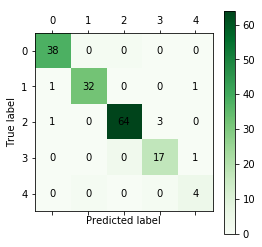

In [11]:
from cm_plot import *
cm_plot(y_train, model.predict(x_train)).show() # cm_plot是自定义的画混淆矩阵的函数

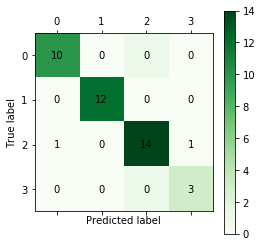

In [12]:
from cm_plot import *
cm_plot(y_test, model.predict(x_test)).show() # cm_plot是自定义的画混淆矩阵的函数